# Sieci neuronowe i Deep Learning
# Temat 4: Biblioteka PyTorch - wprowadzenie

## Zadanie 4.1

1. (**Generowanie danych**).
Stworzyć tensor `data_tensor` o wymiarach `(5, 3)`, który zawiera losowe liczby z przedziału od 0 do 10. Użyć funkcji `torch.randint()`.

2. (**Podstawowa analiza**).
Oblicz średnią wszystkich elementów w `data_tensor`.
Znaleźć maksymalną wartość w każdym wierszu tego tensora oraz indeksy tych maksymalnych wartości. Wykorzystać do tego celu funkcję `torch.max()` z odpowiednimi argumentami.

3. (**Dalsze przekształcenia**).
Znormalizować
`data_tensor`, tak aby wartości w każdym wierszu sumowały się do 1 (lub do 0, jeśli na wejściu cały wiersz składa się z samych zer). To oznacza, że każdy element wiersza należy podzielić przez sumę elementów w danym wierszu. 
Zadbać o to, aby kod był wykonywalny także we wspomnianym przypadku wiersza złożonego z samych zer, na przykład poprzez dodanie bardzo małej wartości (np. `1e-9`) do mianownika.

4. (**Sortowanie**).
Zaimplementować funkcję, która przyjmie tensor jako argument i zwraca tensor, w którym każdy wiersz jest posortowany rosnąco. Wykorzystać do tego celu funkcję `torch.sort()`.

In [3]:
import torch
import numpy as np
torch.manual_seed(0)

data_tensor = torch.randint(low = 0, high = 11, size = (5, 3))
print(f"Data Tensor: {data_tensor}")
print("\n")

mean_val = torch.mean(data_tensor.float())
print(f"Średnia wszystkich elementów: {mean_val}")


max_values_per_row, max_indices_per_row = torch.max(data_tensor, dim=1)
print(f"Wartości maksymalne w każdym wierszu: {max_values_per_row}")
print(f"Indeksy wartości maksymalnych w każdym wierszu: {max_indices_per_row}")

data_tensor_float = data_tensor.float()
row_sums = torch.sum(data_tensor_float, dim=1, keepdim = True)

epsilon = 1e-9

normalized_tensor = data_tensor_float / (row_sums + epsilon)

print(f"Znormalizowany tensor: {normalized_tensor}")
print(f"Suma znormalizowanego tensora: {torch.sum(normalized_tensor, dim=1)}")

def sort_rows_ascending(input_tensor):
    sorted_tensor, indices = torch.sort(input_tensor, dim=1, descending=False)
    return sorted_tensor, indices

sorted_tensor, _= sort_rows_ascending(data_tensor)

print(f"Posortowany tensor: {sorted_tensor}")


Data Tensor: tensor([[10,  7,  1],
        [ 3,  8,  3],
        [ 4,  0,  6],
        [ 8,  9,  4],
        [ 2,  5,  8]])


Średnia wszystkich elementów: 5.199999809265137
Wartości maksymalne w każdym wierszu: tensor([10,  8,  6,  9,  8])
Indeksy wartości maksymalnych w każdym wierszu: tensor([0, 1, 2, 1, 2])
Znormalizowany tensor: tensor([[0.5556, 0.3889, 0.0556],
        [0.2143, 0.5714, 0.2143],
        [0.4000, 0.0000, 0.6000],
        [0.3810, 0.4286, 0.1905],
        [0.1333, 0.3333, 0.5333]])
Suma znormalizowanego tensora: tensor([1., 1., 1., 1., 1.])
Posortowany tensor: tensor([[ 1,  7, 10],
        [ 3,  3,  8],
        [ 0,  4,  6],
        [ 4,  8,  9],
        [ 2,  5,  8]])


## Zadanie 4.2

Stworzyć tensor o wymiarach `(3, 4, 2)` zawierający losowe wartości całkowite z przedziału od 1 do 100 (wyświetlić utworzony tensor). Następnie zamienić w nim drugi wymiar z trzecim (wyświetlić tensor po zamianie) i zmień kształt otrzymanego tensora na `(4, 6)`, łącząc odpowiednio jego elementy (także wyświetlić otrzymany tensor).

In [4]:
initial_tensor = torch.randint(low = 1, high = 101, size = (3, 4, 2))
print(f"Tensor początkowy: {initial_tensor}")
print(f"Kształt tensora początkowego: {initial_tensor.shape}")
swapped_tensor = initial_tensor.transpose(1, 2)
print(f"Tensor po zamianie wymiarów: {swapped_tensor}")
print(f"Kształt tensora po zamianie wymiarów: {swapped_tensor.shape}")
reshaped_tensor = swapped_tensor.reshape(4,6)
print(f"Tensor po przekształceniu: {reshaped_tensor}")
print(f"Kształt tensora po przekształceniu: {reshaped_tensor.shape}")


Tensor początkowy: tensor([[[ 77,  57],
         [ 69,  95],
         [ 34,  27],
         [ 20,  92]],

        [[ 55,  25],
         [ 42,  70],
         [ 70,  50],
         [ 81,  82]],

        [[ 13,  64],
         [ 61,  96],
         [ 86,  23],
         [100,  12]]])
Kształt tensora początkowego: torch.Size([3, 4, 2])
Tensor po zamianie wymiarów: tensor([[[ 77,  69,  34,  20],
         [ 57,  95,  27,  92]],

        [[ 55,  42,  70,  81],
         [ 25,  70,  50,  82]],

        [[ 13,  61,  86, 100],
         [ 64,  96,  23,  12]]])
Kształt tensora po zamianie wymiarów: torch.Size([3, 2, 4])
Tensor po przekształceniu: tensor([[ 77,  69,  34,  20,  57,  95],
        [ 27,  92,  55,  42,  70,  81],
        [ 25,  70,  50,  82,  13,  61],
        [ 86, 100,  64,  96,  23,  12]])
Kształt tensora po przekształceniu: torch.Size([4, 6])


## Zadanie 4.3

Utworzyć tensor `t` o wymiarach `(6, 10)`, zawierający losowe liczby z przedziału od 0 do 1. Podzielić ten tensora na dwie równe części wzdłuż kolumn, a następnie połączyć te części w jeden tensor wzdłuż nowego wymiaru, tak aby otrzymać tensor o rozmiarze `(2, 6, 5)`. Wyświetlić tensory z wszystkich etapów przekształcenia.
Sprawdzić rozmiar powstałego tensora za pomocą metody `shape`.

In [5]:
t = torch.rand(6, 10)
print(f"Tensor t: {t}")
print(f"Kształt tensora t: {t.shape}")


parts = torch.split(t, split_size_or_sections=5, dim =1) # dim =1 -> kolumny, split_size.. = 5, bo kazda ma miec po 5 kolumn

part1 = parts[0]
part2 = parts[1]
print(f"Pierwsza część: {part1}")
print(f"Kształt pierwszej części: {part1.shape}")
print(f"Druga część: {part2}")
print(f"Kształt drugiej części: {part2.shape}")

combined_tensor = torch.stack((part1, part2), dim=0) #dim = 0, bo chcemy rozmiar (2,6,5), a wejsciowe tensory maja ksztalt (6,5)

print(combined_tensor)
print(f"Kształt połączonego tensora: {combined_tensor.shape}")


Tensor t: tensor([[0.7423, 0.5263, 0.2437, 0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932,
         0.2783],
        [0.4820, 0.8198, 0.9971, 0.6984, 0.5675, 0.8352, 0.2056, 0.5932, 0.1123,
         0.1535],
        [0.2417, 0.7262, 0.7011, 0.2038, 0.6511, 0.7745, 0.4369, 0.5191, 0.6159,
         0.8102],
        [0.9801, 0.1147, 0.3168, 0.6965, 0.9143, 0.9351, 0.9412, 0.5995, 0.0652,
         0.5460],
        [0.1872, 0.0340, 0.9442, 0.8802, 0.0012, 0.5936, 0.4158, 0.4177, 0.2711,
         0.6923],
        [0.2038, 0.6833, 0.7529, 0.8579, 0.6870, 0.0051, 0.1757, 0.7497, 0.6047,
         0.1100]])
Kształt tensora t: torch.Size([6, 10])
Pierwsza część: tensor([[0.7423, 0.5263, 0.2437, 0.5846, 0.0332],
        [0.4820, 0.8198, 0.9971, 0.6984, 0.5675],
        [0.2417, 0.7262, 0.7011, 0.2038, 0.6511],
        [0.9801, 0.1147, 0.3168, 0.6965, 0.9143],
        [0.1872, 0.0340, 0.9442, 0.8802, 0.0012],
        [0.2038, 0.6833, 0.7529, 0.8579, 0.6870]])
Kształt pierwszej części: torch.Size([6

## Zadanie 4.4

Przeanalizować kod **Tworzenie zbioru danych z plików z lokalnego dysku** z notebooka z wykładu 4 (jeśli nie zostało to zrobione podczas wykładu).

## Zadanie 4.5*

Wzorując się na fragmencie kodu ,,Tworzenie zbioru danych z plików z lokalnego dysku”,
- utworzyć katalog z własnymi grafikami (podobnych rozmiarów, ale nie takich samych, około 10 sztuk, dotyczących dwóch klas, które da się zidentyfikować po nazwach plików),
- utworzyć listę ścieżek do tych plików,
- wyświetlić obrazy z powyższej listy ścieżek,
- stworzyć etykiety liczbowe (np. `0` i `1`) dla rozważanych obrazów,
- połączyć listę nazw plików (lub ścieżek) z listą etykiet (utworzyć odpowiednią klasę, która dziedziczy po klasie `torch.utils.data.Dataset`),
- utworzyć łańcuch transformacji obrazów za pomocą PyTorch i modułu `torchvision` (funkcja `transforms.Compose()`): konwersja obrazu do tensorów + zmiana rozmiaru każdego obrazu do ustalonych wcześniej wartości,
- dodać powyższe przekształcenie do zdefiniowanej wcześniej klasy typu Dataset i utworzyć instancję zaktualizowanej klasy,
- wyświetlić przekształcone obrazy.

In [6]:
import pathlib

imgdir_path = pathlib.Path("img")

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['img\\animal1.jpg', 'img\\animal2.jpg', 'img\\animal3.jpg', 'img\\animal4.jpg', 'img\\animal5.jpg', 'img\\jaszczur1.jpg', 'img\\jaszczur2.jpg', 'img\\jaszczur3.jpg', 'img\\jaszczur4.jpg', 'img\\jaszczur5.jpg']


Image shape:  (800, 569, 3)
Image shape:  (721, 570, 3)
Image shape:  (920, 736, 3)
Image shape:  (710, 735, 3)
Image shape:  (736, 736, 3)
Image shape:  (985, 736, 3)
Image shape:  (700, 700, 3)
Image shape:  (640, 640, 3)
Image shape:  (400, 602, 3)
Image shape:  (653, 653, 3)


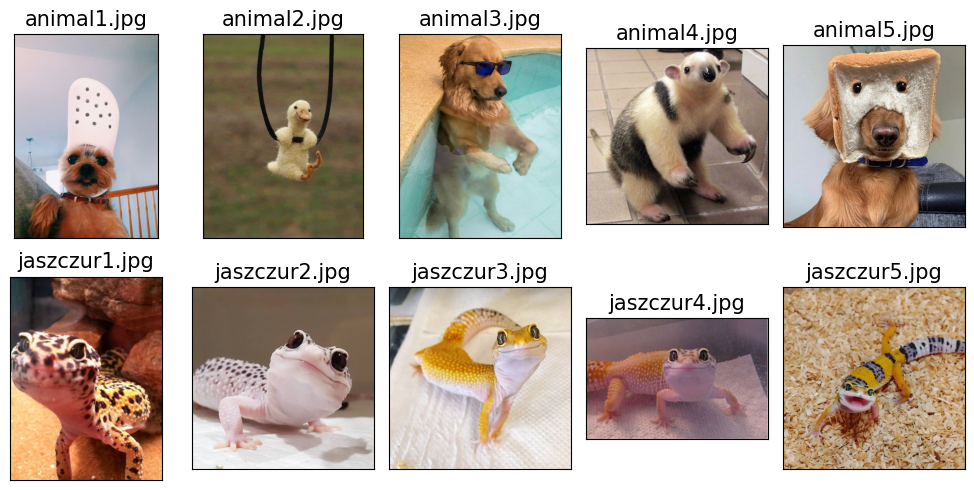

In [7]:
# Wykorzystując Matplotlib oraz PIL, można zwizualizować te pliki
# (wyświetlić obrazy z listy ścieżek do plików):
import matplotlib.pyplot as plt
import os
from PIL import Image  # Importuje klasę Image z biblioteki Pillow (PIL) - do zarządzania obrazami


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

In [8]:
labels = [1 if 'jaszczur' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [9]:
# Mamy dwie listy: listę nazw plików (lub ścieżek) i listę etykiet. Łączymy je:
from torch.utils.data import Dataset
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

img\animal1.jpg 0
img\animal2.jpg 0
img\animal3.jpg 0
img\animal4.jpg 0
img\animal5.jpg 0
img\jaszczur1.jpg 1
img\jaszczur2.jpg 1
img\jaszczur3.jpg 1
img\jaszczur4.jpg 1
img\jaszczur5.jpg 1


In [10]:
!pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.6 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 11.9 MB/s eta 0:00:00


In [11]:
import torchvision.transforms as transforms  # Moduł transforms zawiera zestaw gotowych transformacji obrazów

img_height, img_width = 80, 120
    
transform = transforms.Compose([  # Tworzy łańcuch transformacji (pipeline)
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

In [12]:
# Dodajemy transform (który zdefiniowaliśmy powyżej) do klasy ImageDataset:

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels, transform)

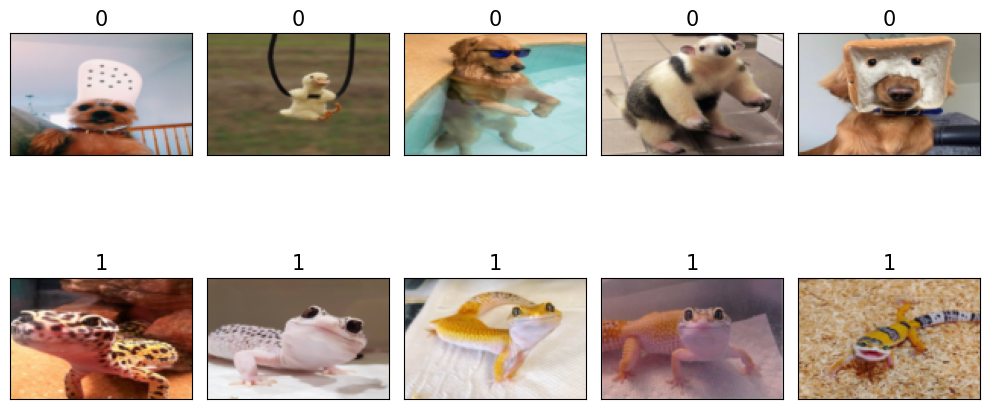

In [13]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.show()